In [24]:
import os
import glob
import time
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
from externel import seaborn as sns

def bin_CT(img, n_bins=1024):
#     data_vector = np.ravel(img)
    data_max = np.amax(data_vector)
    data_min = np.amin(data_vector)
    # print(data_max, data_min)
    data_squeezed = (data_vector-data_min)/(data_max-data_min)
    data_extended = data_squeezed * n_bins
    data_discrete = data_extended // 1
#     print(data_discrete.shape)
    return np.asarray(list(data_discrete), dtype=np.int64)

train_dict = {}
train_dict["time_stamp"] = time.strftime("%Y-%m-%d_%H:%M:%S", time.localtime())
train_dict["project_name"] = "pixel_correlation"
train_dict["save_folder"] = "./project_dir/"+train_dict["project_name"]+"/"

train_dict["folder_X"] = "./data_dir/norm_MR/discrete/"
train_dict["folder_Y"] = "./data_dir/norm_CT/discrete/"

X_list = sorted(glob.glob(train_dict["folder_X"]+"*.nii.gz"))
Y_list = sorted(glob.glob(train_dict["folder_Y"]+"*.nii.gz"))
print(Y_list[:5])

['./data_dir/norm_CT/discrete/NORM_001.nii.gz', './data_dir/norm_CT/discrete/NORM_002.nii.gz', './data_dir/norm_CT/discrete/NORM_003.nii.gz', './data_dir/norm_CT/discrete/NORM_004.nii.gz', './data_dir/norm_CT/discrete/NORM_005.nii.gz']


In [330]:
n_bin = 128
loc_x, loc_y, loc_z = (197, 113, 92)
dx, dy, dz = (3, 3, 3)
dist_Y = np.zeros((n_bin, (dx*2+1)*(dy*2+1)*(dz*2+1)))

for file_path in Y_list[:40]:
    print(file_path)
    Y_file = nib.load(file_path)
    Y_data = Y_file.get_fdata()
    print(Y_data.shape)
    Y_cube = Y_data[loc_x-dx:loc_x+dx+1, loc_y-dy:loc_y+dy+1, loc_z-dz:loc_z+dz+1]
    Y_flat = np.ravel(Y_cube)
    Y_elem = np.unique(Y_cube)
    print(Y_elem)
    for cnt_elem, elem in enumerate(Y_elem):
        loc_elem = np.where(Y_flat == elem)[0]
        for idx_elem in loc_elem:
#             print(int(elem), idx_elem)
            dist_Y[int(elem), idx_elem] += 1

./data_dir/norm_CT/discrete/NORM_001.nii.gz
(256, 256, 182)
[ 42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.  85.
  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.  99.
 100. 101. 102. 103. 104. 105.]
./data_dir/norm_CT/discrete/NORM_002.nii.gz
(256, 256, 182)
[ 42.  43.  44.  45.  46.  47.  48.  61.  62.  63.  64.  65.  66.  67.
  68.  69.  70.  71.  72.  74.  75.  77.  78.  80.  81.  83.  84.  85.
  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.  99.
 100. 101. 102.]
./data_dir/norm_CT/discrete/NORM_003.nii.gz
(256, 256, 182)
[40. 41. 42. 43. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58.
 59. 60. 61. 64. 65. 67. 72. 73. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85.
 86. 87. 88. 89. 90. 91. 92. 93. 94. 95. 96. 97. 98.]
./data_dir/norm_CT/discrete/NORM_004.nii.gz
(256, 256, 182)
[32. 33. 35. 3

(256, 256, 182)
[32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 45. 46. 51. 52. 53. 55.
 56. 57. 58. 59. 60. 61. 62. 63. 65. 66. 67. 68. 69. 70. 71. 74. 76. 77.
 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.]
./data_dir/norm_CT/discrete/NORM_034.nii.gz
(256, 256, 182)
[ 54.  55.  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.
  68.  69.  70.  72.  73.  74.  75.  76.  77.  78.  79.  81.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113.]
./data_dir/norm_CT/discrete/NORM_035.nii.gz
(256, 256, 182)
[41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54. 55. 57. 58. 59.
 60. 61. 62. 64. 65. 66. 67. 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 78.
 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89. 90. 91. 92. 93. 94. 95. 96.]
./data_dir/norm_CT/discrete/NORM_036.nii.gz
(256, 256, 182)
[ 44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  59.  60.  61.
  62.  64.  66.  67.  68. 

In [331]:
print(np.sum(dist_Y))

13720.0


In [336]:
dist_Y[32, :]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       2., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1.,
       1., 1., 1., 1., 1.

In [337]:
Y_nonzero = []
for idx in range(n_bin):
    row_sum = np.sum(dist_Y[idx, :])
#     print(row_sum)
    if row_sum > 0:
        dist_Y[idx, :] /= row_sum
        print(dist_Y[idx, :])
        Y_nonzero.append(idx)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

<Figure size 1800x600 with 0 Axes>

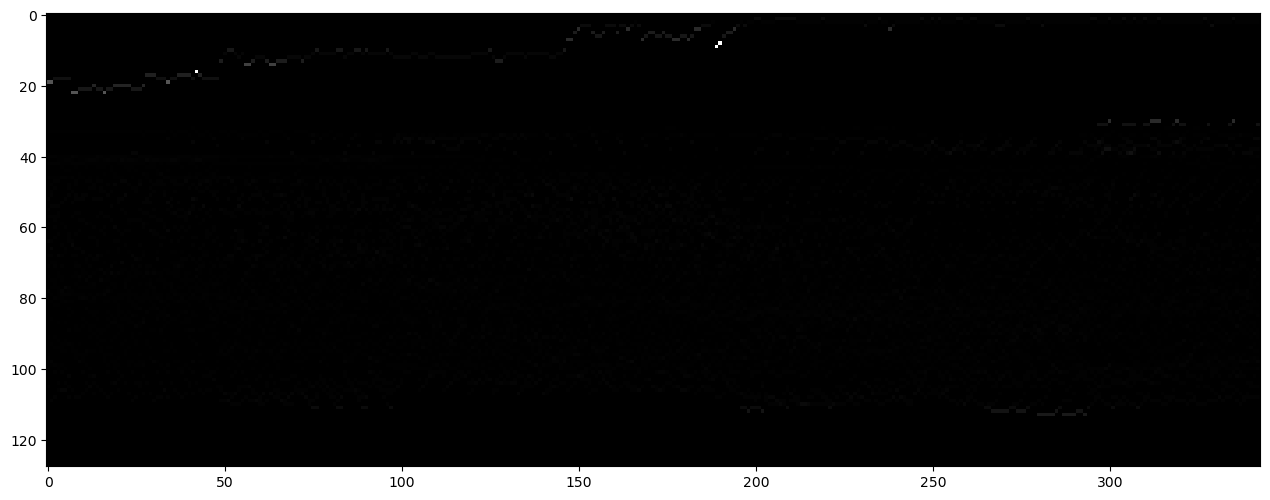

In [338]:
plt.figure(figsize=(18,6), dpi=100)
plt.imshow(dist_Y, cmap='gray', vmax=1)

In [339]:
np.unique(dist_Y)

array([0.        , 0.00128205, 0.0015015 , 0.00182149, 0.00185874,
       0.0025641 , 0.003003  , 0.00314465, 0.0033557 , 0.00337838,
       0.00364299, 0.00371747, 0.00384615, 0.00404858, 0.00411523,
       0.00413223, 0.00421941, 0.00423729, 0.00429185, 0.0044843 ,
       0.0045045 , 0.00473934, 0.0047619 , 0.005     , 0.00512821,
       0.00531915, 0.00537634, 0.00540541, 0.00543478, 0.00546448,
       0.00552486, 0.00557621, 0.00568182, 0.00578035, 0.00581395,
       0.00595238, 0.00598802, 0.00600601, 0.00606061, 0.00609756,
       0.00625   , 0.00628931, 0.00632911, 0.00641026, 0.00649351,
       0.00671141, 0.00675676, 0.00694444, 0.00728597, 0.00735294,
       0.00743494, 0.00746269, 0.00750751, 0.00757576, 0.00763359,
       0.00769231, 0.00809717, 0.00823045, 0.00826446, 0.00840336,
       0.00843882, 0.00847458, 0.00854701, 0.00858369, 0.00862069,
       0.00869565, 0.00884956, 0.00892857, 0.00896861, 0.00897436,
       0.00900901, 0.00909091, 0.00917431, 0.00943396, 0.00947

In [340]:
# n_bin = 128
# loc_x, loc_y, loc_z = (100, 100, 80)
# dx, dy, dz = (5, 5, 5)
dist_X = np.zeros((n_bin, (dx*2+1)*(dy*2+1)*(dz*2+1)))

for file_path in X_list[:5]:
    print(file_path)
    X_file = nib.load(file_path)
    X_data = X_file.get_fdata()
    print(X_data.shape)
    X_cube = X_data[loc_x-dx:loc_x+dx+1, loc_y-dy:loc_y+dy+1, loc_z-dz:loc_z+dz+1]
    X_flat = np.ravel(X_cube)
    X_elem = np.unique(X_cube)
    print(X_elem)
    for cnt_elem, elem in enumerate(X_elem):
        loc_elem = np.where(X_flat == elem)[0]
        for idx_elem in loc_elem:
            dist_X[int(elem), idx_elem] += 1

./data_dir/norm_MR/discrete/NORM_001.nii.gz
(256, 256, 182)
[ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20.
 21. 22. 23. 24. 25. 26. 27. 28. 29.]
./data_dir/norm_MR/discrete/NORM_002.nii.gz
(256, 256, 182)
[ 4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21.
 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33.]
./data_dir/norm_MR/discrete/NORM_003.nii.gz
(256, 256, 182)
[ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19.
 20. 21. 22. 23. 24. 26. 27. 28. 30. 31. 32. 33. 34. 35. 37. 38.]
./data_dir/norm_MR/discrete/NORM_004.nii.gz
(256, 256, 182)
[ 5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22.
 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 40.]
./data_dir/norm_MR/discrete/NORM_005.nii.gz
(256, 256, 182)
[ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19.
 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 34. 35. 36. 37. 38.
 39. 40. 41. 42. 44. 46. 47. 48. 49. 5

In [341]:
X_nonzero = []
for idx in range(n_bin):
    row_sum = np.sum(dist_X[idx, :])
    if row_sum > 0:
        dist_X[idx, :] += 1
        row_sum = np.sum(dist_X[idx, :])
        dist_X[idx, :] /=row_sum
        X_nonzero.append(idx)

<Figure size 1800x600 with 0 Axes>

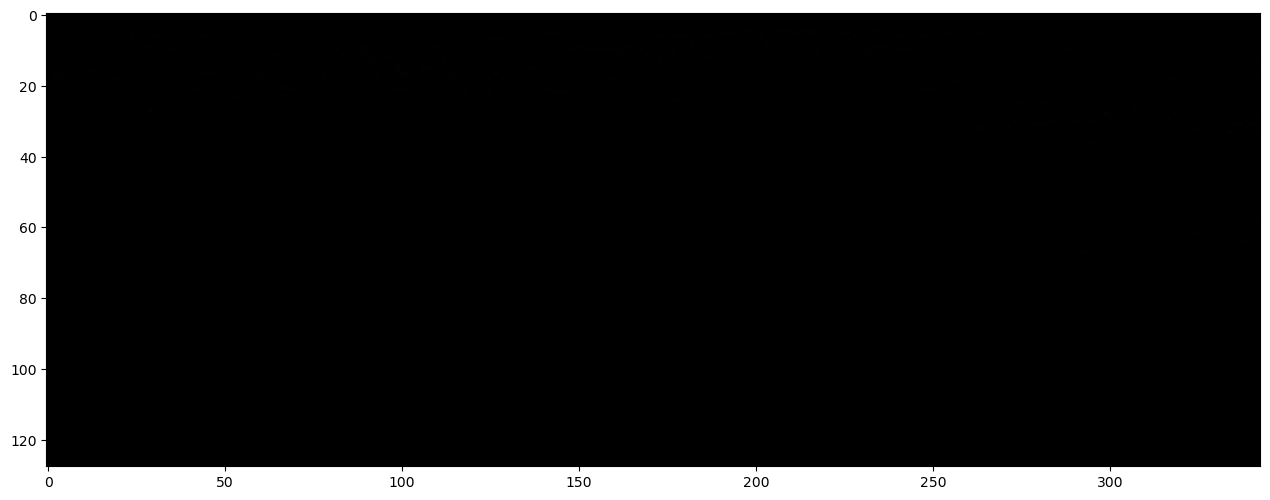

In [342]:
plt.figure(figsize=(18,6), dpi=100)
plt.imshow(dist_X, cmap='gray', vmax=1)

In [343]:
print(X_nonzero)
print(Y_nonzero)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113]


In [344]:
from scipy.special import kl_div
from sklearn.metrics import mean_squared_error as mse

def kl_div_scalar(X, Y):
#     print(X, Y)
    return np.sum(kl_div(X, Y))

In [346]:
dist_YX = np.zeros((len(X_nonzero), len(Y_nonzero)))
for cnt_x, elem_X in enumerate(X_nonzero):
    for cnt_y, elem_Y in enumerate(Y_nonzero):
        dist_YX[cnt_x, cnt_y] = kl_div_scalar(dist_Y[elem_Y, :], dist_X[elem_X, :])
#         print(dist_YX[cnt_x, cnt_y])

In [347]:
X_nonzero

[2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 44,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 55,
 56,
 57,
 58,
 59,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71]

In [348]:
dist_YX[cnt_x, :]

array([2.54480479, 1.10711979, 2.7495992 , 4.04888219, 3.64341708,
       3.44274638, 4.04888219, 5.84064166, 5.84064166, 3.44274638,
       2.1517622 , 2.31428113, 3.64341708, 4.4543473 , 5.84064166,
       3.76120012, 3.06805294, 4.74202937, 3.89473151, 3.44274638,
       4.74202937, 4.04888219, 3.13259146, 0.22728407, 0.21281028,
       0.9513763 , 1.60022521, 2.18247878, 1.8948742 , 1.86327562,
       2.25738417, 0.81787638, 0.90946243, 0.32921611, 0.22055499,
       0.23479985, 0.60709945, 0.86413543, 1.2825579 , 1.26236346,
       1.45957281, 1.31621854, 1.65992089, 1.66751332, 1.54525842,
       1.71463869, 1.34486867, 1.33104551, 1.35055328, 1.35909927,
       1.30139261, 1.4764682 , 1.34496397, 1.40901322, 1.46210756,
       1.46947133, 1.39350544, 1.5314851 , 1.16263322, 1.26804644,
       1.21093612, 1.14674551, 1.23842476, 1.1264847 , 1.09492764,
       0.9685157 , 1.01765277, 0.94391053, 0.94903793, 0.9490238 ,
       0.74746727, 0.77959582, 0.72515185, 0.74421743, 0.78370

In [349]:
np.sum(dist_Y)

105.0

In [350]:
# from IPython.core.interactiveshell import InteractiveShell

# InteractiveShell.ast_node_interactivity = "all"

In [351]:
# import sys
# import numpy
# numpy.set_printoptions(threshold=sys.maxsize)
# # numpy.set_printoptions(threshold=False)

In [352]:
dist_YX

array([[2.54770755, 1.1161566 , 2.75250196, 4.05178495, 3.64631984,
        3.44564914, 4.05178495, 5.84354442, 5.84354442, 3.44564914,
        2.15466496, 2.29679721, 3.64631984, 4.45725006, 5.15039724,
        3.76410288, 3.07095569, 4.74493213, 3.89763427, 3.44564914,
        4.74493213, 4.05178495, 3.13549422, 0.22553484, 0.21313628,
        0.95427906, 1.60312797, 2.18538154, 1.89777696, 1.87637172,
        2.24453358, 0.81087704, 0.89056811, 0.32678697, 0.22345775,
        0.23644005, 0.60531878, 0.85567513, 1.28546066, 1.26526622,
        1.45510166, 1.3191213 , 1.65404964, 1.65116199, 1.54816118,
        1.71754145, 1.34777143, 1.34013708, 1.35345604, 1.3682466 ,
        1.30939204, 1.47207468, 1.34786673, 1.41191598, 1.45821475,
        1.47237409, 1.40265277, 1.53438786, 1.17078709, 1.25910053,
        1.21383888, 1.13906587, 1.24132752, 1.11904198, 1.0978304 ,
        0.9580887 , 1.02900854, 0.93893662, 0.94825373, 0.94772567,
        0.75347831, 0.78249858, 0.72805461, 0.74

In [353]:
print(dist_XY.shape)

(35, 18)


## Pixel is the KL divergence between two distribution
### X is MR value distribution over the space
### Y is CT value distribution over the space

<Figure size 1200x1200 with 0 Axes>

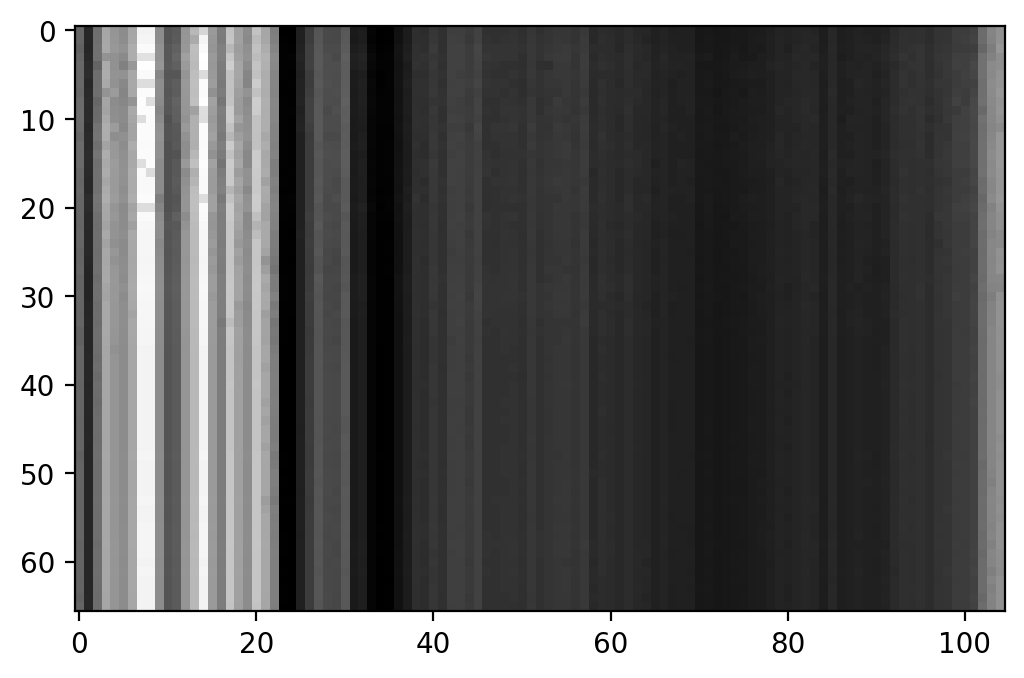

In [354]:
plt.figure(figsize=(6,6), dpi=200)
plt.imshow(dist_YX, cmap='gray')

In [355]:
Y_nonzero

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113]

In [356]:
for cnt_x, elem_X in enumerate(X_nonzero):
    Y_dist_x = dist_YX[cnt_x, :]
#     print(Y_dist_x)
    Y_minKL = np.amin(Y_dist_x)
#     print(Y_minKL)
    Y_minKL_loc = np.where(Y_dist_x == Y_minKL)[0][0]
#     print(Y_minKL_loc)
    print(elem_X, Y_nonzero[Y_minKL_loc])

2 33
3 33
4 43
5 43
6 32
7 33
8 43
9 32
10 33
11 33
12 33
13 33
14 33
15 33
16 33
17 33
18 32
19 33
20 33
21 32
22 43
23 33
24 33
25 33
26 33
27 33
28 33
29 33
30 33
31 44
32 33
33 33
34 33
35 33
36 33
37 33
38 33
39 33
40 33
41 33
42 33
44 33
46 33
47 33
48 33
49 33
50 33
51 33
52 33
53 33
55 33
56 33
57 33
58 43
59 33
61 33
62 32
63 33
64 33
65 33
66 33
67 43
68 33
69 33
70 33
71 33


In [370]:
X_cube

array([[[44., 42., 44., 48., 52., 59., 64.],
        [41., 39., 39., 40., 44., 51., 56.],
        [39., 38., 38., 39., 43., 47., 48.],
        [43., 40., 38., 39., 40., 42., 42.],
        [40., 38., 38., 39., 40., 41., 44.],
        [40., 37., 35., 35., 37., 39., 40.],
        [40., 36., 33., 34., 35., 35., 36.]],

       [[27., 25., 28., 29., 29., 35., 42.],
        [24., 21., 23., 26., 28., 35., 41.],
        [23., 19., 21., 24., 26., 31., 36.],
        [26., 21., 20., 23., 25., 28., 31.],
        [27., 21., 19., 22., 25., 27., 29.],
        [25., 21., 18., 20., 24., 26., 28.],
        [23., 18., 15., 18., 23., 26., 27.]],

       [[ 7.,  7.,  7., 11., 13., 21., 27.],
        [ 7.,  8.,  6.,  7.,  9., 14., 19.],
        [ 7.,  7.,  5.,  6.,  6.,  8., 11.],
        [ 7.,  5.,  5.,  5.,  5.,  7.,  9.],
        [ 8.,  6.,  5.,  5.,  5.,  6.,  7.],
        [ 7.,  5.,  4.,  4.,  5.,  6.,  7.],
        [ 6.,  5.,  5.,  4.,  5.,  6.,  6.]],

       [[ 4.,  4.,  4.,  5.,  4.,  5.,  6.],
    

In [371]:
print(np.gradient(X_cube))

[array([[[-17. , -17. , -16. , -19. , -23. , -24. , -22. ],
        [-17. , -18. , -16. , -14. , -16. , -16. , -15. ],
        [-16. , -19. , -17. , -15. , -17. , -16. , -12. ],
        [-17. , -19. , -18. , -16. , -15. , -14. , -11. ],
        [-13. , -17. , -19. , -17. , -15. , -14. , -15. ],
        [-15. , -16. , -17. , -15. , -13. , -13. , -12. ],
        [-17. , -18. , -18. , -16. , -12. ,  -9. ,  -9. ]],

       [[-18.5, -17.5, -18.5, -18.5, -19.5, -19. , -18.5],
        [-17. , -15.5, -16.5, -16.5, -17.5, -18.5, -18.5],
        [-16. , -15.5, -16.5, -16.5, -18.5, -19.5, -18.5],
        [-18. , -17.5, -16.5, -17. , -17.5, -17.5, -16.5],
        [-16. , -16. , -16.5, -17. , -17.5, -17.5, -18.5],
        [-16.5, -16. , -15.5, -15.5, -16. , -16.5, -16.5],
        [-17. , -15.5, -14. , -15. , -15. , -14.5, -15. ]],

       [[-11.5, -10.5, -12. , -12. , -12.5, -15. , -18. ],
        [-10. ,  -8.5,  -9.5, -11. , -12.5, -16. , -18.5],
        [-10. ,  -7.5,  -8.5, -10. , -11. , -13.5, 

In [375]:
print(X_cube.shape)
grad_3d_x = np.gradient(X_cube)
grad_magn_x = grad_3d_x[0]**2 + grad_3d_x[1]**2 + grad_3d_x[2]**2
grad_magn_x = np.sqrt(grad_magn_x)
print(grad_magn_x.shape)

(7, 7, 7)
(7, 7, 7)


In [377]:
print(grad_magn_x[3, 3, 3])

0.8660254037844386


<Figure size 1200x1200 with 0 Axes>

2 13
3 3
4 15
5 1
6 20
7 11
8 1
9 107
10 22
11 20
12 2
13 20
14 20
15 21
16 113
17 20
18 22
19 113
20 19
21 20
22 21
23 14
24 21
25 22
26 111
27 32
28 13
29 14
30 15
31 15
32 40
33 41
34 43
35 29
36 22
37 42
38 42
39 30
40 15
41 32
42 33
43 32
44 33
45 32
46 33
47 32
48 33
49 43
50 32
51 32
52 41
56 42
59 43
64 43


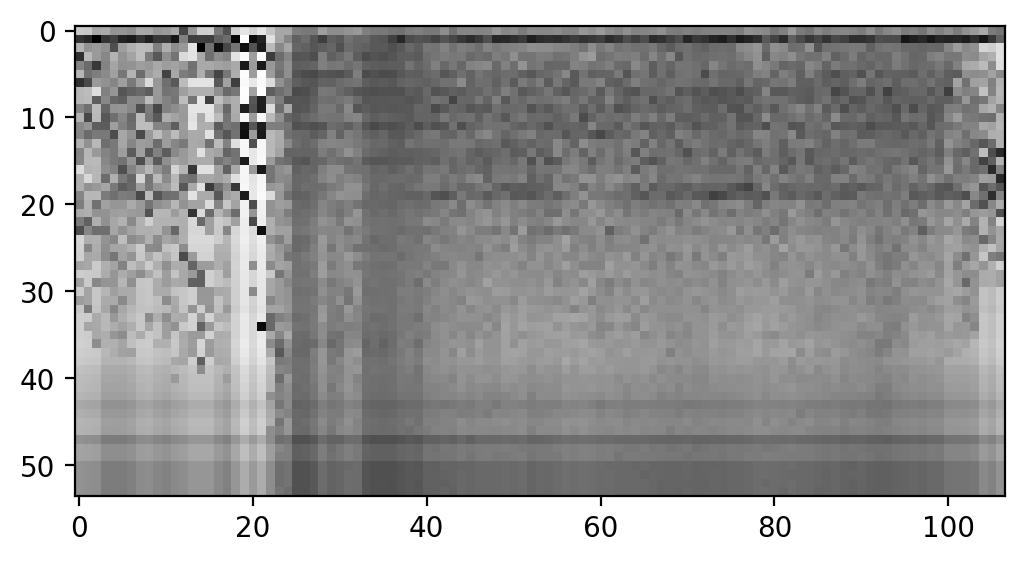

In [363]:
n_bin = 128
loc_x, loc_y, loc_z = (194, 126, 80)
dx, dy, dz = (3, 3, 3)
dist_Y = np.zeros((n_bin, (dx*2+1)*(dy*2+1)*(dz*2+1)))
dist_X = np.zeros((n_bin, (dx*2+1)*(dy*2+1)*(dz*2+1)))

for file_path in Y_list[:40]:
#     print(file_path)
    Y_file = nib.load(file_path)
    Y_data = Y_file.get_fdata()
#     print(Y_data.shape)
    Y_cube = Y_data[loc_x-dx:loc_x+dx+1, loc_y-dy:loc_y+dy+1, loc_z-dz:loc_z+dz+1]
    Y_flat = np.ravel(Y_cube)
    Y_elem = np.unique(Y_cube)
#     print(Y_elem)
    for cnt_elem, elem in enumerate(Y_elem):
        loc_elem = np.where(Y_flat == elem)[0]
        for idx_elem in loc_elem:
#             print(int(elem), idx_elem)
            dist_Y[int(elem), idx_elem] += 1
    
Y_nonzero = []
for idx in range(n_bin):
    row_sum = np.sum(dist_Y[idx, :])
#     print(row_sum)
    if row_sum > 0:
        dist_Y[idx, :] /= row_sum
#         print(dist_Y[idx, :])
        Y_nonzero.append(idx)
        

for file_path in X_list[:10]:
#     print(file_path)
    X_file = nib.load(file_path)
    X_data = X_file.get_fdata()
#     print(X_data.shape)
    X_cube = X_data[loc_x-dx:loc_x+dx+1, loc_y-dy:loc_y+dy+1, loc_z-dz:loc_z+dz+1]
    X_flat = np.ravel(X_cube)
    X_elem = np.unique(X_cube)
#     print(X_elem)
    for cnt_elem, elem in enumerate(X_elem):
        loc_elem = np.where(X_flat == elem)[0]
        for idx_elem in loc_elem:
            dist_X[int(elem), idx_elem] += 1
            
X_nonzero = []
for idx in range(n_bin):
    row_sum = np.sum(dist_X[idx, :])
    if row_sum > 0:
        dist_X[idx, :] += 1e-6
        row_sum = np.sum(dist_X[idx, :])
        dist_X[idx, :] /=row_sum
        X_nonzero.append(idx)
        
dist_YX = np.zeros((len(X_nonzero), len(Y_nonzero)))
for cnt_x, elem_X in enumerate(X_nonzero):
    for cnt_y, elem_Y in enumerate(Y_nonzero):
        dist_YX[cnt_x, cnt_y] = kl_div_scalar(dist_Y[elem_Y, :], dist_X[elem_X, :])
#         print(dist_YX[cnt_x, cnt_y])


plt.figure(figsize=(6,6), dpi=200)
plt.imshow(dist_YX, cmap='gray')

for cnt_x, elem_X in enumerate(X_nonzero):
    Y_dist_x = dist_YX[cnt_x, :]
#     print(Y_dist_x)
    Y_minKL = np.amin(Y_dist_x)
#     print(Y_minKL)
    Y_minKL_loc = np.where(Y_dist_x == Y_minKL)[0][0]
#     print(Y_minKL_loc)
    print(elem_X, Y_nonzero[Y_minKL_loc])

In [368]:
dist_XX = np.zeros((len(X_nonzero), len(X_nonzero)))
for cnt_x, elem_X in enumerate(X_nonzero):
    for cnt_y, elem_Y in enumerate(X_nonzero):
        dist_XX[cnt_x, cnt_y] = mse(dist_X[elem_X, :], dist_X[elem_Y, :])

<Figure size 1200x1200 with 0 Axes>

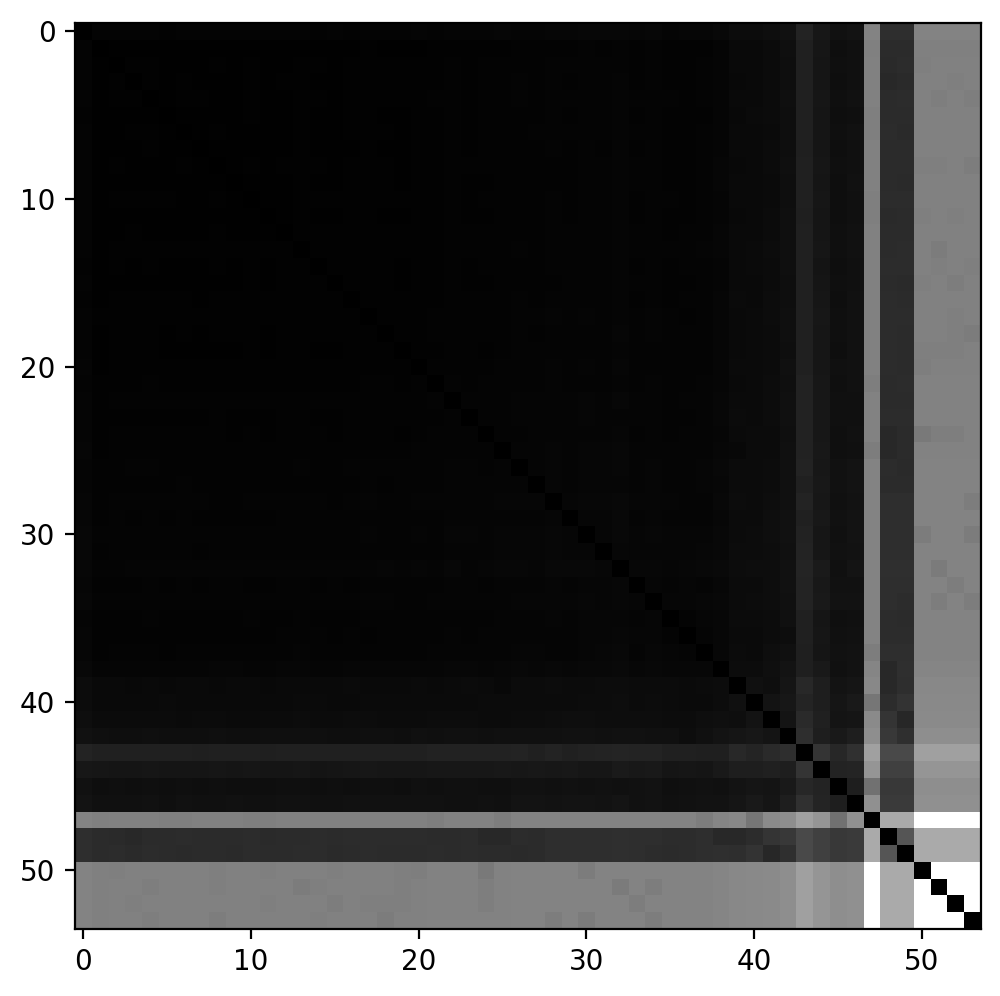

In [369]:
plt.figure(figsize=(6,6), dpi=200)
plt.imshow(dist_XX, cmap='gray')